In [27]:
import pandas as pd
import json
import os
import numpy as np
from metrics import *

In [5]:
corr_dict = {}
for i in range(2, 10):
    corr_dict[i] = {'num_senses': [], 'gmm_ari': [], 'random_ari': []}
    

In [6]:
folder_names = get_corr_words()
for f in folder_names:
    print(f)
    num_senses, ari_result_dict = get_word_senses_ri(f)
    sense_lst = [num_senses] * 1000
    for k in ari_result_dict.keys():
        i = int(k)
        corr_dict[i]['num_senses'] += (sense_lst)
        corr_dict[i]['gmm_ari'] += (ari_result_dict[k]['gmm_raw_aris'])
        corr_dict[i]['random_ari'] += (ari_result_dict[k]['random_baseline_raw_ari'])
    

In [ ]:
results = {}
for i in range(2, 10):
    

In [4]:
for i in range(2, 10):
    compute_correlation(corr_dict, i)

In [12]:
def plot_correlation(corr_dict, max_pcs):
    random_sp, random_pe, gmm_sp, gmm_pe = [], [], [], []
    for k in corr_dict:
        pc_data = corr_dict[k]
        random_sp.append(pc_data['spearman_random'])
        random_pe.append(pc_data['pearson_random'])
        gmm_sp.append(pc_data['spearman_gmm'])
        gmm_pe.append(pc_data['pearson_gmm'])
    num_pcs = np.arange(2, max_pcs)
    plt.figure(figsize = (8, 6))
    plt.subplot(1, 2, 1)
    plt.plot(num_pcs, random_sp, label = "Random Baseline")
    plt.plot(num_pcs, gmm_sp, label = "WordNet Senses")
    plt.xlabel("Principle Components of BERT Embeddings")
    plt.ylabel("Correlation Coefficient")
    plt.title("Spearman Correlation")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(num_pcs, random_pe, label = "Random Baseline")
    plt.plot(num_pcs, gmm_pe, label = "WordNet Senses")
    plt.xlabel("Principle Components of BERT Embeddings")
    plt.ylabel("Correlation Coefficient")
    plt.title("Pearson Correlation")
    plt.legend()
    plt.subplots_adjust(wspace = 0.4)
    plt.savefig('../results/gmm_correlaton.png')

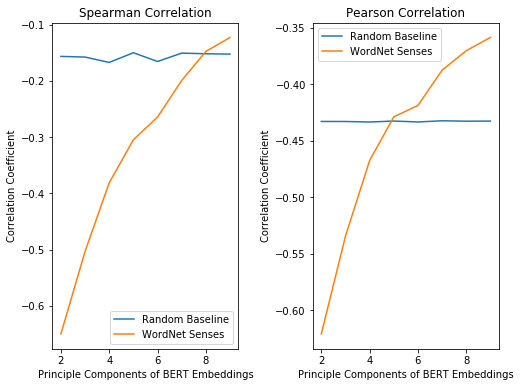

In [13]:
plot_correlation(corr_dict, 10)

In [18]:
all_aris = {}
for i in range(2, 10):
    all_aris[i] = {'wn': [], 'random': []}

In [25]:
for f in os.listdir('data/clustering_results/'):
    word_path = os.path.join('data', 'clustering_results', f)
    if os.path.isdir(word_path) and f not in ['bat_n', 'table_n']:
        json_name = 'gmm_results.json'
        if json_name in os.listdir(word_path):
            with open(os.path.join(word_path, json_name), 'r') as j:
                ari_data = json.load(j)
            for i in range(2, 10):
                json_key = str(i)
                all_aris[i]['wn'] += ari_data[json_key]['gmm_raw_aris']
                all_aris[i]['random'] += ari_data[json_key]['random_baseline_raw_ari']

In [31]:
wn_means = [np.mean(all_aris[k]['wn']) for k in all_aris.keys()]
wn_sds = [np.std(all_aris[k]['wn']) for k in all_aris.keys()]
rand_means = [np.mean(all_aris[k]['random']) for k in all_aris.keys()]
rand_sds = [np.std(all_aris[k]['random']) for k in all_aris.keys()]

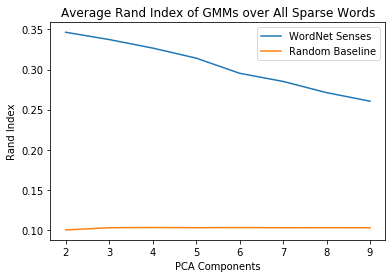

In [36]:
plt.plot(range(2, 10), wn_means, label = 'WordNet Senses')
plt.plot(range(2, 10), rand_means, label = 'Random Baseline')
plt.title("Average Rand Index of GMMs over All Sparse Words")
plt.xlabel("PCA Components")
plt.ylabel("Rand Index")
plt.legend()
